# 나눔폰트

In [91]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

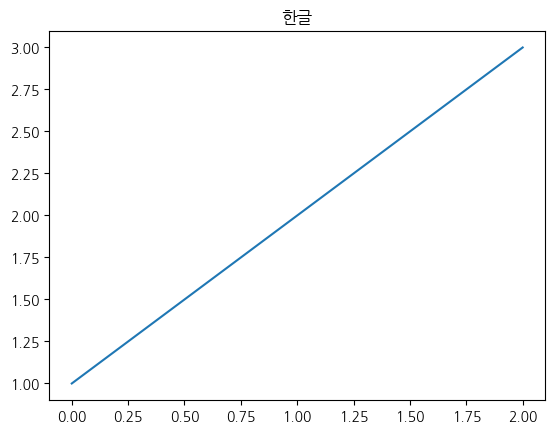

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터 준비

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 서울-서울 간 2021년 기준 배송 데이터 전처리

In [19]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/final/REC_SEND-20231102T013029Z-001/REC_SEND'
test_cj_01 = pd.read_csv(DATA_PATH + '/21_01.csv', encoding='euc-kr')
test_cj_01.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,종로구,11110.0,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,중구,11140.0,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,용산구,11170.0,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,성동구,11200.0,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,광진구,11215.0,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


In [20]:
columns = {'DL_YMD' : '보낸날짜',
           'SEND_CTPV_NM' : '보낸 곳(시)',
           'SEND_CTPV_CD' : '보낸 지역 코드(시)',
           'SEND_CTGG_NM' : '보낸 곳(구)',
           'SEND_CTGG_CD' : '보낸 지역코드(구)',
           'REC_CTPV_NM' : '받는 곳(시)',
           'REC_CTPV_CD' : '받는 지역 코드(시)',
           'REC_CTGG_NM' : '받는 곳(구)',
           'REC_CTGG_CD' : '받는 지역코드(구)',
           'E_C_01' : '가구/인테리어',
           'E_C_02' : '기타',
           'E_C_03' : '도서/음반',
           'E_C_04' : '디지털/음반',
           'E_C_05' : '생활/건강',
           'E_C_06' : '스포츠/레저',
           'E_C_07' : '식품',
           'E_C_08' : '출산/육아',
           'E_C_09' : '패션의류',
           'E_C_10' : '패션잡화',
           'E_C_11' : '화장품/미용'
           }
test_cj_01 = test_cj_01.rename(columns = columns)
test_cj_01.head()

,보낸날짜,보낸 곳(시),보낸 지역 코드(시),보낸 곳(구),보낸 지역코드(구),받는 곳(시),받는 지역 코드(시),받는 곳(구),받는 지역코드(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,종로구,11110.0,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,중구,11140.0,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,용산구,11170.0,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,성동구,11200.0,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,광진구,11215.0,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


In [21]:
test_cj_01 = test_cj_01.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_01.head()

,보낸날짜,보낸 곳(구),받는 곳(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,20210115,양천구,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,양천구,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,양천구,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,양천구,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,양천구,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


In [22]:
test_cj_02 = pd.read_csv(DATA_PATH + '/21_02.csv', encoding='euc-kr')
test_cj_03 = pd.read_csv(DATA_PATH + '/21_03.csv', encoding='euc-kr')
test_cj_04 = pd.read_csv(DATA_PATH + '/21_04.csv', encoding='euc-kr')
test_cj_05 = pd.read_csv(DATA_PATH + '/21_05.csv', encoding='euc-kr')
test_cj_06 = pd.read_csv(DATA_PATH + '/21_06.csv', encoding='euc-kr')
test_cj_07 = pd.read_csv(DATA_PATH + '/21_07.csv', encoding='euc-kr')
test_cj_08 = pd.read_csv(DATA_PATH + '/21_08.csv', encoding='euc-kr')
test_cj_09 = pd.read_csv(DATA_PATH + '/21_09.csv', encoding='euc-kr')
test_cj_10 = pd.read_csv(DATA_PATH + '/21_10.csv', encoding='euc-kr')
test_cj_11 = pd.read_csv(DATA_PATH + '/21_11.csv', encoding='euc-kr')
test_cj_12 = pd.read_csv(DATA_PATH + '/21_12.csv', encoding='euc-kr')

In [23]:
columns = {'DL_YMD' : '보낸날짜',
           'SEND_CTPV_NM' : '보낸 곳(시)',
           'SEND_CTPV_CD' : '보낸 지역 코드(시)',
           'SEND_CTGG_NM' : '보낸 곳(구)',
           'SEND_CTGG_CD' : '보낸 지역코드(구)',
           'REC_CTPV_NM' : '받는 곳(시)',
           'REC_CTPV_CD' : '받는 지역 코드(시)',
           'REC_CTGG_NM' : '받는 곳(구)',
           'REC_CTGG_CD' : '받는 지역코드(구)',
           'E_C_01' : '가구/인테리어',
           'E_C_02' : '기타',
           'E_C_03' : '도서/음반',
           'E_C_04' : '디지털/음반',
           'E_C_05' : '생활/건강',
           'E_C_06' : '스포츠/레저',
           'E_C_07' : '식품',
           'E_C_08' : '출산/육아',
           'E_C_09' : '패션의류',
           'E_C_10' : '패션잡화',
           'E_C_11' : '화장품/미용'
           }
test_cj_02 = test_cj_02.rename(columns = columns)
test_cj_03 = test_cj_03.rename(columns = columns)
test_cj_04 = test_cj_04.rename(columns = columns)
test_cj_05 = test_cj_05.rename(columns = columns)
test_cj_06 = test_cj_06.rename(columns = columns)
test_cj_07 = test_cj_07.rename(columns = columns)
test_cj_08 = test_cj_08.rename(columns = columns)
test_cj_09 = test_cj_09.rename(columns = columns)
test_cj_10 = test_cj_10.rename(columns = columns)
test_cj_11 = test_cj_11.rename(columns = columns)
test_cj_12 = test_cj_12.rename(columns = columns)

In [24]:
test_cj_02 = test_cj_02.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_03 = test_cj_03.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_04 = test_cj_04.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_05 = test_cj_05.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_06 = test_cj_06.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_07 = test_cj_07.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_08 = test_cj_08.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_09 = test_cj_09.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_10 = test_cj_10.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_11 = test_cj_11.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)
test_cj_12 = test_cj_12.drop(['보낸 지역코드(구)', '보낸 지역 코드(시)', '받는 지역 코드(시)', '받는 지역코드(구)', '보낸 곳(시)', '받는 곳(시)'], axis = 1)

In [25]:
data = [test_cj_01, test_cj_02, test_cj_03, test_cj_04, test_cj_05, test_cj_06, test_cj_07, test_cj_08, test_cj_09, test_cj_10, test_cj_11, test_cj_12]
test_cj_2011 = pd.concat(data)
test_cj_2011

,보낸날짜,보낸 곳(구),받는 곳(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,20210115,양천구,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,양천구,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,양천구,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,양천구,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,양천구,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,20211224,용산구,관악구,0.0,55.0,28.0,234.0,55.0,5.0,21.0,3.0,37.0,61.0,12.0
18166,20211224,용산구,서초구,6.0,71.0,48.0,358.0,82.0,3.0,19.0,4.0,52.0,60.0,22.0
18167,20211224,용산구,강남구,0.0,130.0,53.0,619.0,107.0,12.0,34.0,7.0,83.0,118.0,27.0
18168,20211224,용산구,송파구,0.0,83.0,77.0,409.0,72.0,13.0,29.0,5.0,74.0,83.0,22.0


## 날짜데이터조합(월로쪼개려고)

In [28]:
test_cj_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210874 entries, 0 to 18169
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   보낸날짜     210874 non-null  int64  
 1   보낸 곳(구)  210874 non-null  object 
 2   받는 곳(구)  210874 non-null  object 
 3   가구/인테리어  210874 non-null  float64
 4   기타       210874 non-null  float64
 5   도서/음반    210874 non-null  float64
 6   디지털/음반   210874 non-null  float64
 7   생활/건강    210874 non-null  float64
 8   스포츠/레저   210874 non-null  float64
 9   식품       210874 non-null  float64
 10  출산/육아    210874 non-null  float64
 11  패션의류     210874 non-null  float64
 12  패션잡화     210874 non-null  float64
 13  화장품/미용   210874 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 24.1+ MB


In [30]:
test_cj_2011['보낸날짜'] = pd.to_datetime(test_cj_2011['보낸날짜'], format='%Y%m%d')
test_cj_2011['연도'] = test_cj_2011['보낸날짜'].dt.year
test_cj_2011['월'] = test_cj_2011['보낸날짜'].dt.month
test_cj_2011['일'] = test_cj_2011['보낸날짜'].dt.day
test_cj_2011.head()

,보낸날짜,보낸 곳(구),받는 곳(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,연도,월,일
0,2021-01-15,양천구,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0,2021,1,15
1,2021-01-15,양천구,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0,2021,1,15
2,2021-01-15,양천구,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0,2021,1,15
3,2021-01-15,양천구,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0,2021,1,15
4,2021-01-15,양천구,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0,2021,1,15


In [31]:
test_cj_2011 = test_cj_2011.drop(['보낸날짜'], axis = 1)
test_cj_2011

,보낸 곳(구),받는 곳(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,연도,월,일
0,양천구,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0,2021,1,15
1,양천구,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0,2021,1,15
2,양천구,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0,2021,1,15
3,양천구,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0,2021,1,15
4,양천구,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0,2021,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,용산구,관악구,0.0,55.0,28.0,234.0,55.0,5.0,21.0,3.0,37.0,61.0,12.0,2021,12,24
18166,용산구,서초구,6.0,71.0,48.0,358.0,82.0,3.0,19.0,4.0,52.0,60.0,22.0,2021,12,24
18167,용산구,강남구,0.0,130.0,53.0,619.0,107.0,12.0,34.0,7.0,83.0,118.0,27.0,2021,12,24
18168,용산구,송파구,0.0,83.0,77.0,409.0,72.0,13.0,29.0,5.0,74.0,83.0,22.0,2021,12,24


In [32]:
month_cj_2011 = test_cj_2011.drop(['연도', '일'], axis = 1)
month_cj_2011

,보낸 곳(구),받는 곳(구),가구/인테리어,기타,도서/음반,디지털/음반,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,월
0,양천구,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0,1
1,양천구,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0,1
2,양천구,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0,1
3,양천구,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0,1
4,양천구,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,용산구,관악구,0.0,55.0,28.0,234.0,55.0,5.0,21.0,3.0,37.0,61.0,12.0,12
18166,용산구,서초구,6.0,71.0,48.0,358.0,82.0,3.0,19.0,4.0,52.0,60.0,22.0,12
18167,용산구,강남구,0.0,130.0,53.0,619.0,107.0,12.0,34.0,7.0,83.0,118.0,27.0,12
18168,용산구,송파구,0.0,83.0,77.0,409.0,72.0,13.0,29.0,5.0,74.0,83.0,22.0,12


In [37]:
month_cj_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210874 entries, 0 to 18169
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   보낸 곳(구)  210874 non-null  object 
 1   받는 곳(구)  210874 non-null  object 
 2   가구/인테리어  210874 non-null  float64
 3   기타       210874 non-null  float64
 4   도서/음반    210874 non-null  float64
 5   디지털/음반   210874 non-null  float64
 6   생활/건강    210874 non-null  float64
 7   스포츠/레저   210874 non-null  float64
 8   식품       210874 non-null  float64
 9   출산/육아    210874 non-null  float64
 10  패션의류     210874 non-null  float64
 11  패션잡화     210874 non-null  float64
 12  화장품/미용   210874 non-null  float64
 13  월        210874 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 24.1+ MB


## 생활건강만 추출

In [40]:
health = month_cj_2011.groupby('받는 곳(구)')['생활/건강'].sum().reset_index()

In [41]:
health

,받는 곳(구),생활/건강
0,강남구,1050215.0
1,강동구,450657.0
2,강북구,252175.0
3,강서구,639685.0
4,관악구,493854.0
5,광진구,368203.0
6,구로구,425889.0
7,금천구,282211.0
8,노원구,463630.0
9,도봉구,274452.0


# 2021년 서울 인구 전처리

In [58]:
people_age = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final/서울시 주민등록인구(연령별_동별)_2021-2022년.csv')
people_age.head()

,동별(1),동별(2),항목,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
0,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,소계,계,9736027,250044,345196,372040,394566,638174,847622,...,713186,729540,585417,410611,305700,219981,101884,34635,7864,1319
2,합계,소계,한국인,9509458,244538,339145,367879,388257,603077,819200,...,690974,717931,579856,408481,305015,219561,101648,34536,7818,1292
3,합계,소계,외국인,226569,5506,6051,4161,6309,35097,28422,...,22212,11609,5561,2130,685,420,236,99,46,27
4,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,11928,11688,9047,6251,5237,4358,2117,729,190,29


In [59]:
people_age_2021 = people_age.iloc[:, :25]

In [60]:
people_age_2021.head()

,동별(1),동별(2),항목,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,...,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19,2021.20,2021.21
0,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,소계,계,9736027,250044,345196,372040,394566,638174,847622,...,730761,732970,568036,398337,299887,199533,96094,33907,7957,1665
2,합계,소계,한국인,9509458,244538,339145,367879,388257,603077,819200,...,705302,722662,563260,396569,299231,199138,95871,33815,7920,1643
3,합계,소계,외국인,226569,5506,6051,4161,6309,35097,28422,...,25459,10308,4776,1768,656,395,223,92,37,22
4,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,12371,11770,8954,6312,5400,4089,2078,753,200,32


In [61]:
people_2021 = people_age_2021.rename(columns=people_age_2021.iloc[0]).drop(people_age_2021.index[0]).reset_index(drop=True)
people_2021.head()

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,합계,소계,계,9736027,250044,345196,372040,394566,638174,847622,...,730761,732970,568036,398337,299887,199533,96094,33907,7957,1665
1,합계,소계,한국인,9509458,244538,339145,367879,388257,603077,819200,...,705302,722662,563260,396569,299231,199138,95871,33815,7920,1643
2,합계,소계,외국인,226569,5506,6051,4161,6309,35097,28422,...,25459,10308,4776,1768,656,395,223,92,37,22
3,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
4,종로구,소계,한국인,144683,2720,4264,4934,5447,9965,12837,...,11857,11511,8841,6254,5383,4078,2071,750,200,32


In [62]:
people_2021 = people_2021.drop(people_2021.index[:3])
people_2021

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
3,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
4,종로구,소계,한국인,144683,2720,4264,4934,5447,9965,12837,...,11857,11511,8841,6254,5383,4078,2071,750,200,32
5,종로구,소계,외국인,9106,129,175,158,402,2970,1364,...,514,259,113,58,17,11,7,3,-,-
6,종로구,사직동,계,9636,207,362,346,336,473,753,...,726,724,505,361,343,311,168,63,22,1
7,종로구,사직동,한국인,9372,202,356,342,333,465,737,...,705,714,493,357,343,309,167,62,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,송파구,소계,한국인,658338,20263,28110,28956,28679,38241,52181,...,47606,48952,38584,24774,16486,9796,5206,2039,528,90
170,송파구,소계,외국인,5627,122,138,94,81,298,638,...,704,277,102,49,18,12,4,2,1,-
171,강동구,소계,계,466472,14770,19737,19953,19025,25956,35173,...,35082,37555,29298,18937,12619,7513,3785,1495,342,81
172,강동구,소계,한국인,462664,14678,19643,19891,18959,25732,34735,...,34595,37366,29216,18910,12608,7509,3784,1494,342,80


In [63]:
people_2021 = people_2021[~people_2021['동별(2)'].str.contains('동')]
people_2021

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
3,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
4,종로구,소계,한국인,144683,2720,4264,4934,5447,9965,12837,...,11857,11511,8841,6254,5383,4078,2071,750,200,32
5,종로구,소계,외국인,9106,129,175,158,402,2970,1364,...,514,259,113,58,17,11,7,3,-,-
57,중구,소계,계,131787,3140,3674,3272,3698,9114,12329,...,10382,10406,8205,5709,4634,3308,1693,670,147,26
58,중구,소계,한국인,122499,2927,3372,3053,3421,7369,10940,...,9679,10072,8011,5628,4593,3284,1683,667,145,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,송파구,소계,한국인,658338,20263,28110,28956,28679,38241,52181,...,47606,48952,38584,24774,16486,9796,5206,2039,528,90
170,송파구,소계,외국인,5627,122,138,94,81,298,638,...,704,277,102,49,18,12,4,2,1,-
171,강동구,소계,계,466472,14770,19737,19953,19025,25956,35173,...,35082,37555,29298,18937,12619,7513,3785,1495,342,81
172,강동구,소계,한국인,462664,14678,19643,19891,18959,25732,34735,...,34595,37366,29216,18910,12608,7509,3784,1494,342,80


In [64]:
people_2021 = people_2021[~people_2021['항목'].str.contains('인')]
people_2021.head()

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
3,종로구,소계,계,153789,2849,4439,5092,5849,12935,14201,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
57,중구,소계,계,131787,3140,3674,3272,3698,9114,12329,...,10382,10406,8205,5709,4634,3308,1693,670,147,26
105,용산구,소계,계,237285,6364,7664,7601,8218,14147,20868,...,17652,17147,12772,8916,7255,5632,2997,1143,282,73
108,성동구,소계,계,292672,9305,10155,9065,10109,20309,26065,...,22491,22099,15988,11193,8973,6080,2933,965,197,51
111,광진구,소계,계,352627,7661,10714,12070,13318,28026,38693,...,26680,25910,18905,12517,9487,6515,3000,1004,244,51


In [65]:
people_2021 = people_2021.drop(['동별(2)', '항목'], axis = 1)
columns = {'동별(1)' : '지역'}
people_2021 = people_2021.rename(columns = columns)
people_2021

,지역,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
3,종로구,153789,2849,4439,5092,5849,12935,14201,11044,9838,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
57,중구,131787,3140,3674,3272,3698,9114,12329,11352,10386,...,10382,10406,8205,5709,4634,3308,1693,670,147,26
105,용산구,237285,6364,7664,7601,8218,14147,20868,21403,19988,...,17652,17147,12772,8916,7255,5632,2997,1143,282,73
108,성동구,292672,9305,10155,9065,10109,20309,26065,23908,24086,...,22491,22099,15988,11193,8973,6080,2933,965,197,51
111,광진구,352627,7661,10714,12070,13318,28026,38693,30680,26130,...,26680,25910,18905,12517,9487,6515,3000,1004,244,51
114,동대문구,352006,8854,11049,10993,12527,31718,33747,25993,24943,...,25604,26739,21153,15070,12275,8286,3884,1205,269,69
117,중랑구,391885,9601,12009,12142,13487,22512,32697,30159,28061,...,33880,34860,26088,17868,13349,8752,3954,1307,297,67
120,성북구,440142,11424,16190,17352,19360,34899,35927,29603,30406,...,31734,32099,24941,17830,14688,10349,4807,1676,352,66
123,강북구,302563,5776,8522,9757,11145,19022,23046,19094,18808,...,25046,26435,20953,16242,13106,8718,3797,1190,280,47
126,도봉구,319373,6936,10188,11469,12905,19471,22626,19619,20154,...,27118,29060,22405,15436,12057,8478,4004,1388,303,89


In [66]:
people_2021 = people_2021.reset_index(drop = True)
people_2021

,지역,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,종로구,153789,2849,4439,5092,5849,12935,14201,11044,9838,...,12371,11770,8954,6312,5400,4089,2078,753,200,32
1,중구,131787,3140,3674,3272,3698,9114,12329,11352,10386,...,10382,10406,8205,5709,4634,3308,1693,670,147,26
2,용산구,237285,6364,7664,7601,8218,14147,20868,21403,19988,...,17652,17147,12772,8916,7255,5632,2997,1143,282,73
3,성동구,292672,9305,10155,9065,10109,20309,26065,23908,24086,...,22491,22099,15988,11193,8973,6080,2933,965,197,51
4,광진구,352627,7661,10714,12070,13318,28026,38693,30680,26130,...,26680,25910,18905,12517,9487,6515,3000,1004,244,51
5,동대문구,352006,8854,11049,10993,12527,31718,33747,25993,24943,...,25604,26739,21153,15070,12275,8286,3884,1205,269,69
6,중랑구,391885,9601,12009,12142,13487,22512,32697,30159,28061,...,33880,34860,26088,17868,13349,8752,3954,1307,297,67
7,성북구,440142,11424,16190,17352,19360,34899,35927,29603,30406,...,31734,32099,24941,17830,14688,10349,4807,1676,352,66
8,강북구,302563,5776,8522,9757,11145,19022,23046,19094,18808,...,25046,26435,20953,16242,13106,8718,3797,1190,280,47
9,도봉구,319373,6936,10188,11469,12905,19471,22626,19619,20154,...,27118,29060,22405,15436,12057,8478,4004,1388,303,89


In [67]:
people_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역       25 non-null     object
 1   합계       25 non-null     object
 2   0~4세     25 non-null     object
 3   5~9세     25 non-null     object
 4   10~14세   25 non-null     object
 5   15~19세   25 non-null     object
 6   20~24세   25 non-null     object
 7   25~29세   25 non-null     object
 8   30~34세   25 non-null     object
 9   35~39세   25 non-null     object
 10  40~44세   25 non-null     object
 11  45~49세   25 non-null     object
 12  50~54세   25 non-null     object
 13  55~59세   25 non-null     object
 14  60~64세   25 non-null     object
 15  65~69세   25 non-null     object
 16  70~74세   25 non-null     object
 17  75~79세   25 non-null     object
 18  80~84세   25 non-null     object
 19  85~89세   25 non-null     object
 20  90~94세   25 non-null     object
 21  95~99세   25 non-null     object
 22  100세

In [70]:
for column in ['합계', '0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
               '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']:
    people_2021[column] = pd.to_numeric(people_2021[column], errors='coerce')

people_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역       25 non-null     object
 1   합계       25 non-null     int64 
 2   0~4세     25 non-null     int64 
 3   5~9세     25 non-null     int64 
 4   10~14세   25 non-null     int64 
 5   15~19세   25 non-null     int64 
 6   20~24세   25 non-null     int64 
 7   25~29세   25 non-null     int64 
 8   30~34세   25 non-null     int64 
 9   35~39세   25 non-null     int64 
 10  40~44세   25 non-null     int64 
 11  45~49세   25 non-null     int64 
 12  50~54세   25 non-null     int64 
 13  55~59세   25 non-null     int64 
 14  60~64세   25 non-null     int64 
 15  65~69세   25 non-null     int64 
 16  70~74세   25 non-null     int64 
 17  75~79세   25 non-null     int64 
 18  80~84세   25 non-null     int64 
 19  85~89세   25 non-null     int64 
 20  90~94세   25 non-null     int64 
 21  95~99세   25 non-null     int64 
 22  100세

In [71]:
people_2021['10대 이하'] = people_2021['0~4세'] +	people_2021['5~9세']
people_2021['10대'] = people_2021['10~14세'] +	people_2021['15~19세']
people_2021['20대'] = people_2021['20~24세'] +	people_2021['25~29세']
people_2021['30대'] = people_2021['30~34세'] +	people_2021['35~39세']
people_2021['40대'] = people_2021['40~44세'] +	people_2021['45~49세']
people_2021['50대'] = people_2021['50~54세'] +	people_2021['55~59세']
people_2021['60대'] = people_2021['60~64세'] +	people_2021['65~69세']
people_2021['70대'] = people_2021['70~74세'] +	people_2021['75~79세']
people_2021['80대'] = people_2021['80~84세'] +	people_2021['85~89세']
people_2021['90대'] = people_2021['90~94세'] +	people_2021['95~99세']
people_2021_age = people_2021.drop(['0~4세',	'5~9세', '10~14세',	'15~19세', '20~24세',	'25~29세', '30~34세',	'35~39세', '40~44세',	'45~49세', '50~54세',
                                '55~59세', '60~64세',	'65~69세', '70~74세',	'75~79세', '80~84세',	'85~89세', '90~94세',	'95~99세'], axis = 1)
people_2021_age

,지역,합계,100세 이상,10대 이하,10대,20대,30대,40대,50대,60대,70대,80대,90대
0,종로구,153789,32,7288,10941,27136,20882,22019,25935,20724,11712,6167,953
1,중구,131787,26,6814,6970,21443,21738,18657,21367,18611,10343,5001,817
2,용산구,237285,73,14028,15819,35015,41391,36696,38119,29919,16171,8629,1425
3,성동구,292672,51,19460,19174,46374,47994,44096,47095,38087,20166,9013,1162
4,광진구,352627,51,18375,25388,66719,56810,51726,55976,44815,22004,9515,1248
5,동대문구,352006,69,19903,23520,65465,50936,49899,53333,47892,27345,12170,1474
6,중랑구,391885,67,21610,25629,55209,58220,56354,68321,60948,31217,12706,1604
7,성북구,440142,66,27614,36712,70826,60009,68229,69944,57040,32518,15156,2028
8,강북구,302563,47,14298,20902,42068,37902,44400,52225,47388,29348,12515,1470
9,도봉구,319373,89,17124,24374,42097,39773,46483,56302,51465,27493,12482,1691


In [72]:
people_2021_age['100세 이상'] = people_2021_age.pop('100세 이상')
people_2021_age

,지역,합계,10대 이하,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세 이상
0,종로구,153789,7288,10941,27136,20882,22019,25935,20724,11712,6167,953,32
1,중구,131787,6814,6970,21443,21738,18657,21367,18611,10343,5001,817,26
2,용산구,237285,14028,15819,35015,41391,36696,38119,29919,16171,8629,1425,73
3,성동구,292672,19460,19174,46374,47994,44096,47095,38087,20166,9013,1162,51
4,광진구,352627,18375,25388,66719,56810,51726,55976,44815,22004,9515,1248,51
5,동대문구,352006,19903,23520,65465,50936,49899,53333,47892,27345,12170,1474,69
6,중랑구,391885,21610,25629,55209,58220,56354,68321,60948,31217,12706,1604,67
7,성북구,440142,27614,36712,70826,60009,68229,69944,57040,32518,15156,2028,66
8,강북구,302563,14298,20902,42068,37902,44400,52225,47388,29348,12515,1470,47
9,도봉구,319373,17124,24374,42097,39773,46483,56302,51465,27493,12482,1691,89


In [74]:
people_2021_age['60대 이상'] = people_2021_age['60대'] +	people_2021_age['70대'] + people_2021_age['80대'] + people_2021_age['90대'] + people_2021_age['100세 이상']
people_2021_age['10-30대'] = people_2021_age['10대'] + people_2021_age['20대'] + people_2021_age['30대']
people_2021_age[['지역', '60대 이상', '10-30대']]

,지역,60대 이상,10-30대
0,종로구,39588,58959
1,중구,34798,50151
2,용산구,56217,92225
3,성동구,68479,113542
4,광진구,77633,148917
5,동대문구,88950,139921
6,중랑구,106542,139058
7,성북구,106808,167547
8,강북구,90768,100872
9,도봉구,93220,106244


# 비교

In [75]:
health.rename(columns = {'받는 곳(구)' : '지역'}, inplace = True)
health

,지역,생활/건강
0,강남구,1050215.0
1,강동구,450657.0
2,강북구,252175.0
3,강서구,639685.0
4,관악구,493854.0
5,광진구,368203.0
6,구로구,425889.0
7,금천구,282211.0
8,노원구,463630.0
9,도봉구,274452.0


In [78]:
age_health = people_2021_age.merge(health, on='지역')
age_health

,지역,합계,10대 이하,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세 이상,60대 이상,10-30대,생활/건강
0,종로구,153789,7288,10941,27136,20882,22019,25935,20724,11712,6167,953,32,39588,58959,235824.0
1,중구,131787,6814,6970,21443,21738,18657,21367,18611,10343,5001,817,26,34798,50151,264261.0
2,용산구,237285,14028,15819,35015,41391,36696,38119,29919,16171,8629,1425,73,56217,92225,323376.0
3,성동구,292672,19460,19174,46374,47994,44096,47095,38087,20166,9013,1162,51,68479,113542,357254.0
4,광진구,352627,18375,25388,66719,56810,51726,55976,44815,22004,9515,1248,51,77633,148917,368203.0
5,동대문구,352006,19903,23520,65465,50936,49899,53333,47892,27345,12170,1474,69,88950,139921,347613.0
6,중랑구,391885,21610,25629,55209,58220,56354,68321,60948,31217,12706,1604,67,106542,139058,338172.0
7,성북구,440142,27614,36712,70826,60009,68229,69944,57040,32518,15156,2028,66,106808,167547,435621.0
8,강북구,302563,14298,20902,42068,37902,44400,52225,47388,29348,12515,1470,47,90768,100872,252175.0
9,도봉구,319373,17124,24374,42097,39773,46483,56302,51465,27493,12482,1691,89,93220,106244,274452.0


In [83]:
age_health_2021 = age_health[['지역', '합계', '10-30대', '60대 이상', '생활/건강']]
age_health_2021

,지역,합계,10-30대,60대 이상,생활/건강
0,종로구,153789,58959,39588,235824.0
1,중구,131787,50151,34798,264261.0
2,용산구,237285,92225,56217,323376.0
3,성동구,292672,113542,68479,357254.0
4,광진구,352627,148917,77633,368203.0
5,동대문구,352006,139921,88950,347613.0
6,중랑구,391885,139058,106542,338172.0
7,성북구,440142,167547,106808,435621.0
8,강북구,302563,100872,90768,252175.0
9,도봉구,319373,106244,93220,274452.0


In [89]:
age_health_2021['노인층 비율'] = age_health_2021['60대 이상'] / age_health_2021['합계'] * 100
age_health_2021['1인당 생활/건강 물품 주문율'] = age_health_2021['생활/건강'] / age_health_2021['합계'] * 100
age_health_2021_re = age_health_2021[['지역', '노인층 비율', '1인당 생활/건강 물품 주문율']]
age_health_2021_re['노인층 비율'] = age_health_2021_re['노인층 비율'].round(2)
age_health_2021_re['1인당 생활/건강 물품 주문율'] = age_health_2021_re['1인당 생활/건강 물품 주문율'].round(2)
age_health_2021_re

<ipython-input-89-ccd88dfac785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_health_2021['노인층 비율'] = age_health_2021['60대 이상'] / age_health_2021['합계'] * 100
<ipython-input-89-ccd88dfac785>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_health_2021['1인당 생활/건강 물품 주문율'] = age_health_2021['생활/건강'] / age_health_2021['합계'] * 100
<ipython-input-89-ccd88dfac785>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,지역,노인층 비율,1인당 생활/건강 물품 주문율
0,종로구,25.74,153.34
1,중구,26.40,200.52
2,용산구,23.69,136.28
3,성동구,23.40,122.07
4,광진구,22.02,104.42
5,동대문구,25.27,98.75
6,중랑구,27.19,86.29
7,성북구,24.27,98.97
8,강북구,30.00,83.35
9,도봉구,29.19,85.93


# 시각화

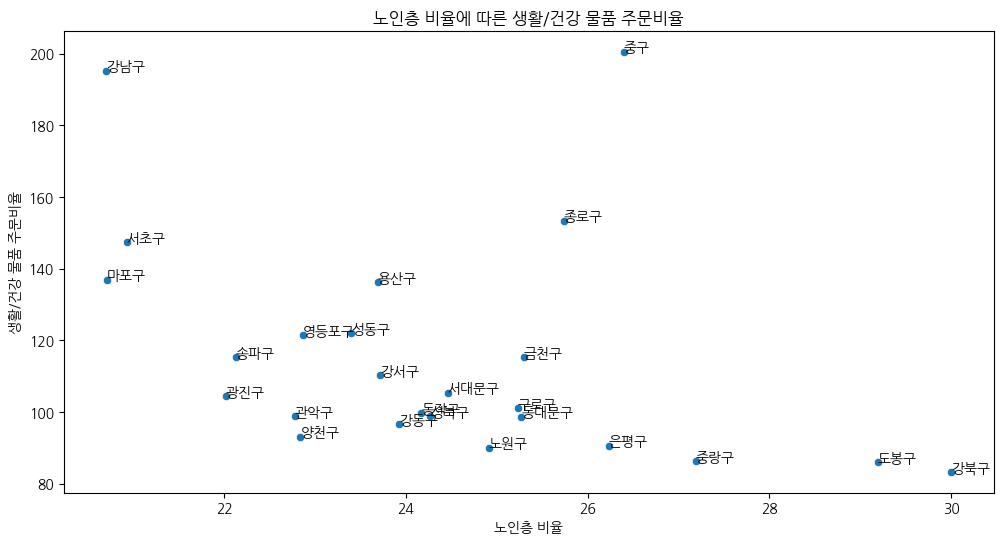

In [90]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='노인층 비율', y='1인당 생활/건강 물품 주문율', data=age_health_2021_re)

# 그래프에 지역 이름 표시
for i, txt in enumerate(age_health_2021_re['지역']):
    plt.annotate(txt, (age_health_2021_re['노인층 비율'][i], age_health_2021_re['1인당 생활/건강 물품 주문율'][i]), fontsize=10)

plt.title("노인층 비율에 따른 생활/건강 물품 주문비율")
plt.xlabel("노인층 비율")
plt.ylabel("생활/건강 물품 주문비율")

plt.show()